In [104]:
import pandas as pd
import numpy as np
import os
import traceback
import pdb
import configparser
import matplotlib.pyplot as plt
np.seterr(all="ignore")
plt.rcParams['text.usetex'] = True
#--- user libs
import utility as utl
import imp
imp.reload(utl)


class Symbols:
    def __init__(self):
        self.colors = ['black','red','green','blue','cyan','brown','grey','magenta','orange','yellow']
        self.fillstyles=['white',None,'white',None,'white',None,'white',None,'white',None,'white',None,'white',None,'white',None]
        self.markers=['o','s','D','^','<','>','v']
        self.markersizes=[10,10,10,12,12,12,10]
        self.nmax=7
        
    def GetAttrs(self,count=0,label='',nevery=1,fmt='.-',zorder=1):
        if count > self.nmax:
            print('index out of list bound!')
            return 
        attrs={ 'color':self.colors[count],
            'markersize':self.markersizes[count],
            'marker':self.markers[count],
            'markerfacecolor':self.colors[count],
            'markeredgecolor':'white', #'black' if not self.fillstyles[count] else None,
            'label':label,
           'markevery':nevery,
           'errorevery':nevery,
           'markeredgewidth':1.75,
            'linewidth':1, 
           'barsabove':None,
           'capsize':5,
           'capthick':1,
           'elinewidth':1,
           'fmt':fmt,
             'zorder':zorder,
         }
        return attrs
    
    def GetAttrs2nd(self,count=0,label='',nevery=1,fmt='.-',zorder=1):
        if count > self.nmax:
            print('index out of list bound!')
            return 
        attrs={ 'color':self.colors[count],
            'markersize':self.markersizes[count],
            'marker':self.markers[count],
            'markerfacecolor':'white',
#            'markeredgecolor':'black' if not self.fillstyles[count] else None,
            'label':label,
           'markevery':nevery,
           'errorevery':nevery,
           'markeredgewidth':1.75,
            'linewidth':1, 
           'barsabove':None,
           'capsize':5,
           'capthick':1,
           'elinewidth':1,
           'fmt':fmt,
            'zorder':zorder,
          }
        return attrs

class Legends:
    def __init__(self
                ):
        pass
    def Set(self,fontsize=20,
                 labelspacing=0,
                 **kwargs
#                 bbox_to_anchor=(0.5,0.48,0.5,0.5),
           ):
        self.attrs = {'frameon':False,'fontsize':fontsize,
                   'labelspacing':labelspacing,
                      'handletextpad':.2,
                   'handlelength':1,
                    **kwargs,
                     }
    def Get(self):
        return self.attrs

# set parameters
## load curves

In [87]:
parser = configparser.ConfigParser()
parser.read('config.ini')

path=parser['test data directory']['path']
#
inputFiles = os.listdir('%s'%(path))
print('inputFiles=',np.array(inputFiles))




inputFiles= ['tensile300k.txt' 'tensile700k.txt' 'tensile900k.txt' 'tensile600k.txt'
 'tensile800k.txt']


# Parse load curves

In [21]:
#--- read input file
loadTimeSeries=list(map(lambda x:pd.DataFrame(np.c_[np.loadtxt('%s/%s'%(path,x))],
                columns=['Time','Stress']),inputFiles))
loadTimeSeries[0] #--- index indicates the indenter location

,Time,Stress
0,3.498214e-14,-0.037254
1,1.000000e-05,-0.036465
2,2.000000e-05,-0.035594
3,3.000000e-05,-0.034639
4,4.000000e-05,-0.033637
...,...,...
799995,7.999950e+00,4.748868
799996,7.999960e+00,4.751020
799997,7.999970e+00,4.753173
799998,7.999980e+00,4.755352


# Plot timeseries

mkdir: png: File exists


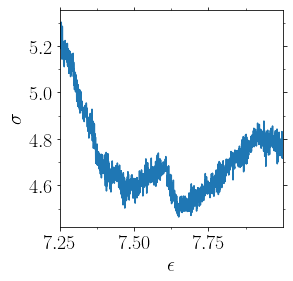

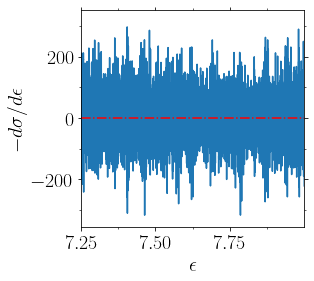

<AxesSubplot:xlabel='$\\epsilon$', ylabel='$-d\\sigma/d\\epsilon$'>

In [59]:
!mkdir png

#--- set limits
index = 0 #--- file index
ld = loadTimeSeries[ index ] #--- file id
# indentLabel, grainID = GetGrainId(indent,indentLabels,loadID,index)
# print('indent label:%s, grain id:%s'%(indentLabel,grainID))

#--- time
tlo = 7.25 #ld.Time.min()
thi = ld.Time.max()
filtr=np.all([ld['Time']<thi,ld['Time']>=tlo],axis=0)
# #--- load
flo = 0.99*ld['Stress'][filtr].min()
fhi = 1.01*ld['Stress'][filtr].max() #ld.Force.max()

#--- load vs. time
utl.PltErr(ld.Time, ld.Stress,
           attrs={'fmt':'-'},
            xlim=(tlo,thi),
            ylim=(flo,fhi),
           xstr=r'$\epsilon$',
           ystr=r'$\sigma$',
           title='png/stress_timeseries.png'
          )

ax=utl.PltErr(ld.Time, -np.gradient(ld.Stress,ld.Time),
           attrs={'fmt':'-'},
            Plot=False,
          )

utl.PltErr([tlo,thi],[0,0],
           attrs={'fmt':'-.r'},
            xlim=(tlo,thi),
#            ylim=(flo,fhi),
           xstr=r'$\epsilon$',
           ystr=r'$-d\sigma/d\epsilon$',
           ax=ax,
           title='png/stress_derivative.png'
          )


## output timeseries

# Avalanche statistics

## Avalanche size

# of avalanches:726
# of avalanches:1428
# of avalanches:1797
# of avalanches:1162
# of avalanches:1545


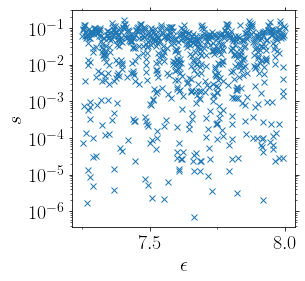

<AxesSubplot:xlabel='$\\epsilon$', ylabel='$s$'>

In [197]:
def Wrapper_GetAvl(ld,tlo,thi,lambdc):
    '''
    return avalanche sizes given force timeseries and initial and final times
    '''
    
#    print(np.min(GetPower(ld,tlo,thi)))
    
    #--- data frame storing avalanche attributes
    filtr = np.all([ld.Time>tlo,ld.Time<thi],axis=0)

    df_avl = utl.GetAvl( np.array(ld.Time[filtr]), -np.gradient(ld.Stress,ld.Time)[filtr], lambdc)
    print('# of avalanches:%s'%df_avl.shape[0])
    #df_avl = GetAvalKunMethod( broken_bonds,  5) #tcrltn )

    #--- save
    # df_fltrd = DataFrameSubSet( df_avl, #--- filter
    #                               'ti', 
    #                               ( 0, tavl ) ) 
    # df_fltrd.to_pickle('df_avl.pk')

    df_avl.sort_values( by = 'size',ascending = False,inplace=True)
#    print ('n.avls = %s'%len(df_avl))
    return df_avl #np.array(df_avl['size'].to_list())
    
lambdc = 1.0e-3 #--- threshold
temps=['300','700','900','600','800']
try:
#    df_avl = np.concatenate(list(map(lambda x:Wrapper_GetAvl(x,tlo,thi,lambdc), loadTimeSeries)))
    df_avl = dict(zip(temps,list(map(lambda x:Wrapper_GetAvl(x,tlo,thi,lambdc), loadTimeSeries))))
#    print('df_avl.shape:%s'%df_avl['300'].shape[0])
#    df_avl = Wrapper_GetAvl(ld,tlo,thi,lambdc)
except:
    print('increase the threshold')
    
    

utl.PltErr(df_avl['300']['tf'],df_avl['300']['size'],
           attrs={'fmt':'x'},
#             xlim=(tlo,thi),
#            ylim=(flo,fhi),
           xstr=r'$\epsilon$',
           ystr=r'$s$',
           yscale='log',
           title='png/size.png'
          )


### pdf

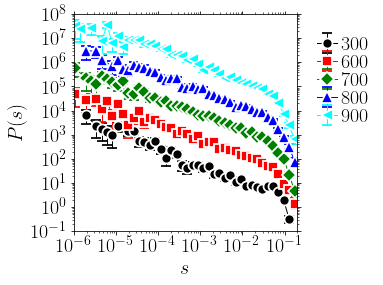

<AxesSubplot:xlabel='$s$', ylabel='$P(s)$'>

In [210]:
ax = utl.PltErr(None,None,Plot=False)
symbols=Symbols()
legend=Legends()
legend.Set(fontsize=20,
                 labelspacing=0,
                 bbox_to_anchor=(.9,0.48,0.5,0.5),
           )

alpha=1.0
for count,temp in zip(range(len(df_avl)),['300','600','700','800','900']): #--- different temperatures
    sizes = df_avl[temp]['size']
    smax = np.max(sizes)
    hist, edge, err = utl.GetPDF(sizes, n_per_decade=8, linscale=None)

    utl.PltErr(edge, 
               10**count*hist,#*edge**alpha, 
               yerr=10**count*err,#*edge**alpha,
               Plot=False,ax=ax,
               attrs=symbols.GetAttrs(count=count,label=r'$%s$'%temp))

utl.PltErr(None, None,
           attrs={'fmt':'-.r'},
#           ystr=r'$P(s).s^{%s}$'%alpha,
           ystr=r'$P(s)$',
           xstr=r'$s$',
           xscale = 'log',
           yscale='log',
           xlim=(1.0e-6,.2),
           ylim=(1e-1,1e8),#(1e-3,1e4),
           ax=ax,
           title='png/ps.png',
            legend=legend.Get()
          )

### vary threshold

# of avalanches:726
# of avalanches:726
# of avalanches:728
# of avalanches:728
# of avalanches:718
# of avalanches:391


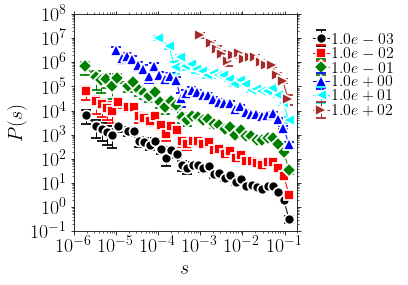

<AxesSubplot:xlabel='$s$', ylabel='$P(s)$'>

In [186]:
def varyThreshold(loadTimeSeries, tlo, thi, lambdc):
    return np.concatenate(list(map(lambda x:Wrapper_GetAvl(x,tlo,thi,lambdc)['size'], loadTimeSeries)))

legend=Legends()
legend.Set(fontsize=16,
                 labelspacing=0,
                 bbox_to_anchor=(1,0.48,0.5,0.5),
           )
#
alpha=1.0
#
lambdc = np.logspace(np.log10(1.0e-3),np.log10(1.0e2),6)
size_lambdc = list(map(lambda x:varyThreshold([loadTimeSeries[0]], tlo, thi, x),lambdc))

#--- distributions
hists = list(map(lambda x: utl.GetPDF(x, n_per_decade=8, linscale=None), size_lambdc))

ax = utl.PltErr(None,None,Plot=False)
for item, threshold, indx in zip(hists, lambdc, range(len(hists))):
    hist, edge, err = item
    ax=utl.PltErr(edge, 
                  10**indx*hist,#*edge**alpha, 
                  yerr=10**indx*err,#*edge**alpha,
                   attrs=symbols.GetAttrs(count=indx%7,label=r'$%2.1e$'%threshold),
                    Plot = False,
                    ax=ax,
                  )
utl.PltErr(None,None,
#    edge, 1e-1/edge**alpha,
#           attrs={'fmt':'-.r'},
            legend=legend.Get(),
#           ystr=r'$P(s).s^{%s}$'%alpha,xstr=r'$s$',
           ystr=r'$P(s)$',xstr=r'$s$',
           xscale = 'log',yscale='log',
           xlim=(1.0e-6,.2),ylim=(1e-1,1e8), #hist.min(),hist.min()*1e8),
           ax=ax,
           title='png/ps.png',
          )

[ 1.25007966 -0.53496973 12.76198166]


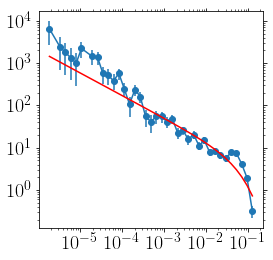

<AxesSubplot:>

In [170]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * x**b * np.exp(-c * x)
def func2(x, a, b):
    return a * x**b

xdata = edge
ydata = hist
yerr=err
ax = utl.PltErr(xdata, ydata, yerr=yerr, label='data',Plot=False)
popt, pcov = curve_fit(func, xdata, ydata,
                      bounds=((1e-3,-4,1e-3), (np.infty, 0, 100.0)),
                       p0=(1,-1,10.0),
                       sigma=err,
                      )
print(popt)
utl.PltErr(xdata, func(xdata, *popt), attrs={'fmt':'r-'},
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt),
        ax=ax,
           xscale='log',yscale='log',
          )



In [348]:
input_file = '/Users/Home/Desktop/Tmp/txt/git/DislocationAvalanches/nanoindentation/ebsd/attributes.txt'
grain_attr = pd.read_csv(input_file,sep='\t')
grain_attr.head()

,#grainID,x,y,grainSize,perimeter,boundarySize,numNeighbors
0,1,-0.018954,0.068387,1,3.695012,5,1
1,2,-85.909030,-0.799994,1,2.771259,6,1
2,3,-85.909030,-2.399981,1,2.771259,6,2
3,4,-141.335700,-0.852774,10,13.056300,24,3
4,5,-85.909030,-3.199974,1,2.771259,6,3


In [349]:
def Wrapper(index):
    #index = 0 #--- file index
    ld = loadTimeSeries[ index ] #--- file id
    indentLabel = indentLabels[index]

    grainLabel = grainLabels[loadID][indentLabel]
    print('indent label:%s, grain label:%s'%(indentLabel,grainLabel))

    lambdc = 10.0
    avlanche = Wrapper_GetAvl(ld,tlo,thi,lambdc)
    moment_1st = np.mean(avlanche)
    avalanche_sq = avlanche*avlanche
    moment_2nd = np.mean(avalanche_sq)**0.5
    avalanche_4th = avalanche_sq*avalanche_sq
    moment_4th = np.mean(avalanche_4th)**0.25

    grainSize = grain_attr[ grain_attr['#grainID'] == grainLabel ].grainSize
#    pdb.set_trace()
    return grainSize.iloc[0], moment_1st, moment_2nd, moment_4th


#val = np.c_[list(map(lambda x:Wrapper(x),range(len(loadTimeSeries))))]
# utl.PltErr(utl.Zscore(val[:,0]),utl.Zscore(val[:,1]),
#           attrs={'fmt' : '.',
#           'markersize':10.0},
#             xstr=r'grain size',
#             ystr=r'1st moment',
#            xlim=(-3,3),
#            ylim=(-3,3),
#           )

# utl.PltErr(utl.Zscore(val[:,0]),utl.Zscore(val[:,2]),
#           attrs={'fmt' : '.',
#           'markersize':10.0},
#             xstr=r'grain size',
#             ystr=r'2nd moment',
#            xlim=(-3,3),
#            ylim=(-3,3),
#           )
# utl.PltErr(val[:,0],val[:,2],
#           attrs={'fmt' : '.',
#           'markersize':10.0},
#             xstr=r'grain size',
#             ystr=r'avalanche size(2nd moment)',
#            title='avalancheSize.png'
# #           xlim=(-3,3),
# #           ylim=(-3,3),
#           )

# utl.PltErr(utl.Zscore(val[:,0]),utl.Zscore(val[:,3]),
#           attrs={'fmt' : '.',
#           'markersize':10.0},
#             xstr=r'grain size',
#             ystr=r'4th moment',
#            xlim=(-3,3),
#            ylim=(-3,3),
#           )
